In [2]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
import shutil
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
np.set_printoptions(precision=2,suppress=True)

In [1]:
import tensorflow as tf 


In [3]:
print(tf.__version__)

2.7.0


In [4]:
from datetime import datetime
import numpy as np
%load_ext tensorboard

In [7]:
tf.keras.datasets?

In [5]:
mnist = tf.keras.datasets.fashion_mnist

In [6]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

In [7]:
import matplotlib.pyplot as plt

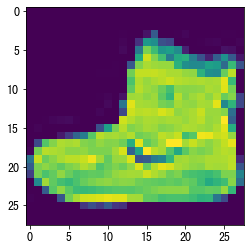

In [8]:
plt.imshow(training_images[0])

In [12]:
training_labels[0]

9

In [19]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [11]:
training_images[0].shape

(28, 28)

In [12]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

In [22]:
type(training_images[0])

numpy.ndarray

In [13]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
#     loss=tf.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

In [20]:
model.compile(
    optimizer=tf.optimizers.Adam(),
#     loss="sparse_categorical_crossentropy",
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"],
)

In [14]:
logdir = "log/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

'log/fit/20220107-011519'

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
model.fit(training_images, training_labels, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8939
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9008
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9038
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9073
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2399 - accuracy: 0.9089


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8693


[0.3653552830219269, 0.8693000078201294]

In [84]:
%tensorboard --logdir log --port=6123 --bind_all

In [47]:
classifications = model.predict(test_images)
print(classifications)
print(type(classifications))
print(classifications.dtype)

[[0.   0.   0.   ... 0.01 0.   0.99]
 [0.   0.   0.99 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.01 0.   0.  ]]
<class 'numpy.ndarray'>
float32


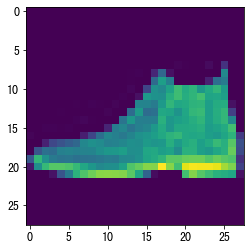

In [48]:
plt.imshow(test_images[0])

### 1024

In [74]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

In [75]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
#     loss=tf.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

In [77]:
model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2107 - accuracy: 0.9209
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2027 - accuracy: 0.9243
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1960 - accuracy: 0.9266
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1861 - accuracy: 0.9295
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1813 - accuracy: 0.9306
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1764 - accuracy: 0.9337
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1703 - accuracy: 0.9355
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1635 - accuracy: 0.9396
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1583 - accuracy: 0.9401
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.157

In [78]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.4:
            print("loss已经小于0.4，停止训练")
            self.model.stop_training = True
        

In [80]:
callback=myCallback()

In [82]:
model.fit(training_images, training_labels, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0918 - accuracy: 0.9653


In [83]:
training_images.shape

(60000, 28, 28)